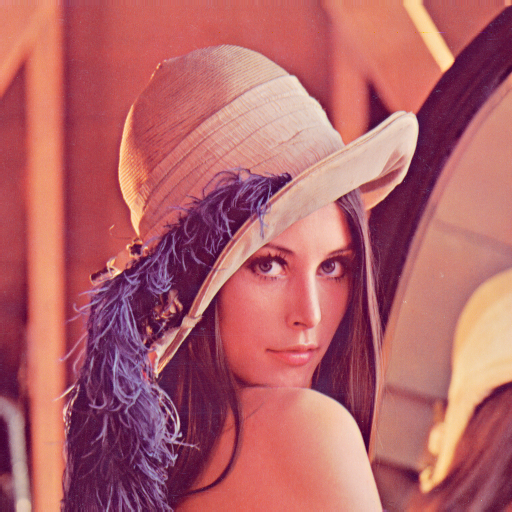

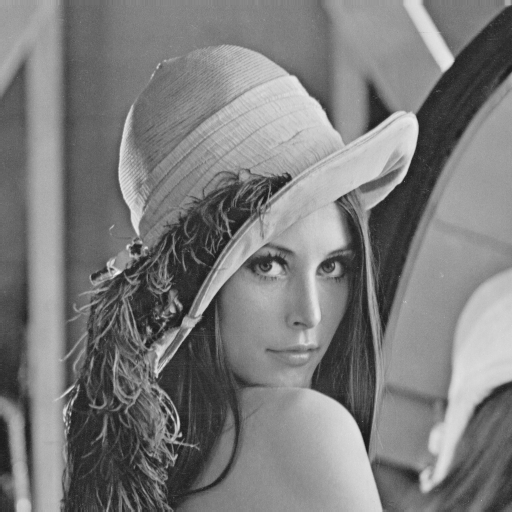

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread('lennacolor.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(imgGray)

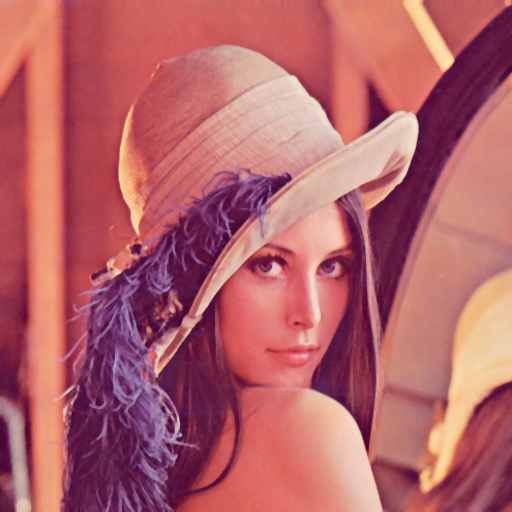

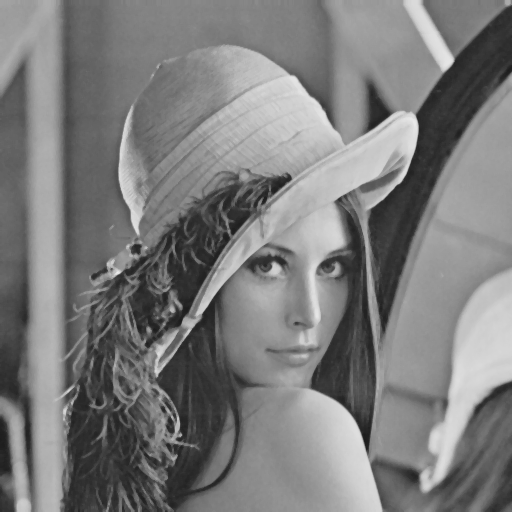

In [27]:
# Filtro mediana con medianBlur
imgMedianBlur = cv.medianBlur(img, 3)
imgMedianBlurGray = cv.medianBlur(imgGray, 3)
cv2_imshow(imgMedianBlur)
cv2_imshow(imgMedianBlurGray)

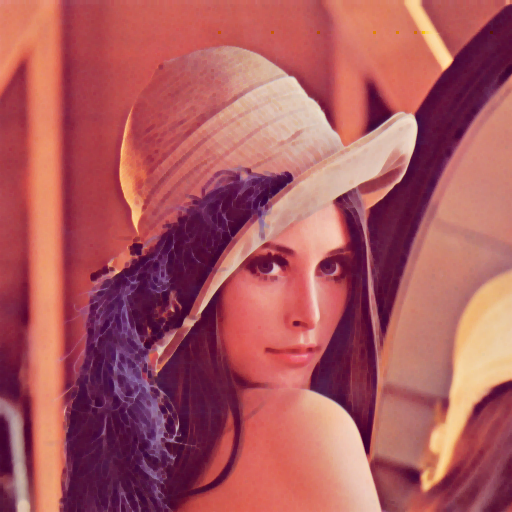

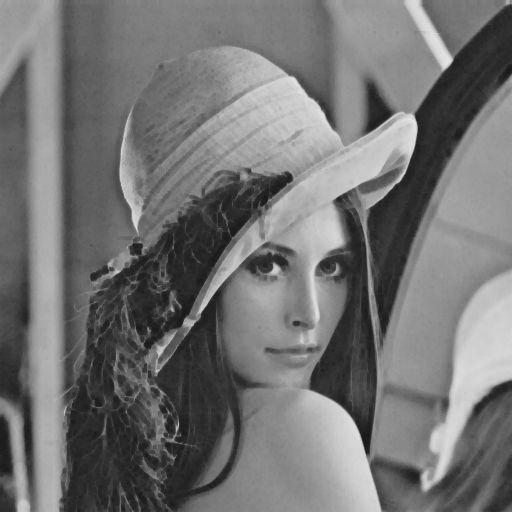

In [28]:
# Filtro mínimo con ndimage y scipy
from scipy import ndimage

imgMin = ndimage.minimum_filter(img, size=3, axes=(0, 1))
imgMinGray = ndimage.minimum_filter(imgGray, size=3, axes=(0, 1))
cv2_imshow(imgMin)
cv2_imshow(imgMinGray)

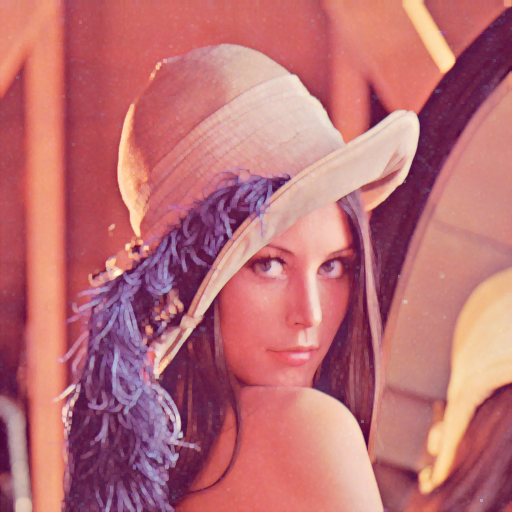

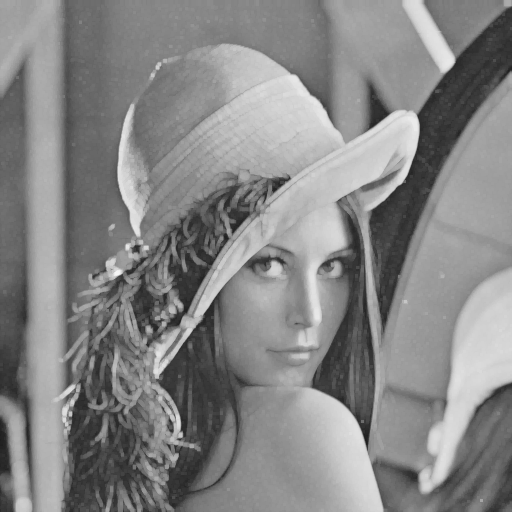

In [29]:
# Filtro máximo con ndimage y scipy
imgMax = ndimage.maximum_filter(img, size=3, axes=(0, 1))
imgMaxGray = ndimage.maximum_filter(imgGray, size=3, axes=(0, 1))
cv2_imshow(imgMax)
cv2_imshow(imgMaxGray)

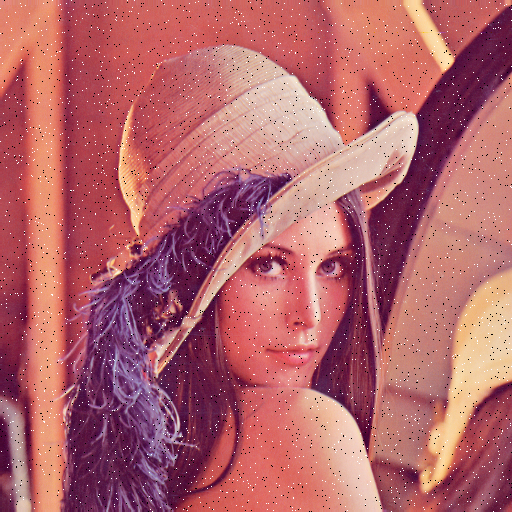

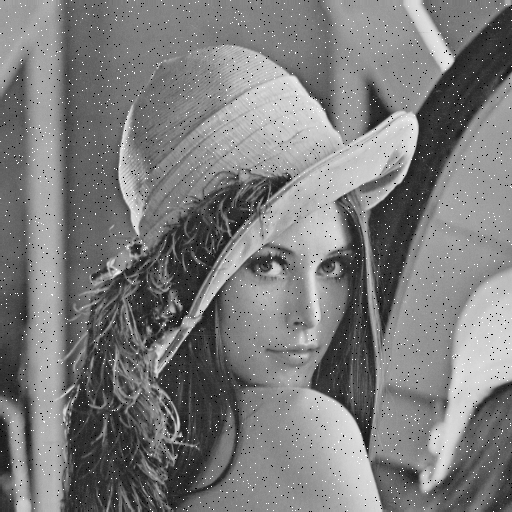

In [30]:
# Ruido a la imagen con salt and pepper
def sp_noise(image, prob):
  output = image.copy()
  if len(image.shape) == 2:
    black = 0
    white = 255
  else:
    black = np.array([0, 0, 0], dtype='uint8')
    white = np.array([255, 255, 255], dtype='uint8')
  probs = np.random.random(image.shape[:2])
  output[probs < prob] = black
  output[probs > 1 - prob] = white
  return output

imgNoise = sp_noise(img, 0.01)
imgNoiseGray = cv.cvtColor(imgNoise, cv.COLOR_BGR2GRAY)
cv2_imshow(imgNoise)
cv2_imshow(imgNoiseGray)

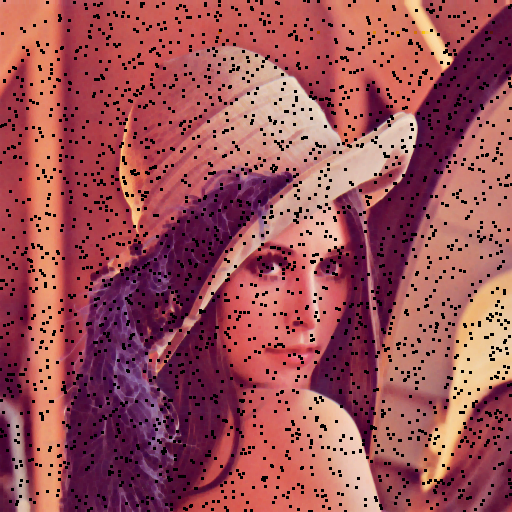

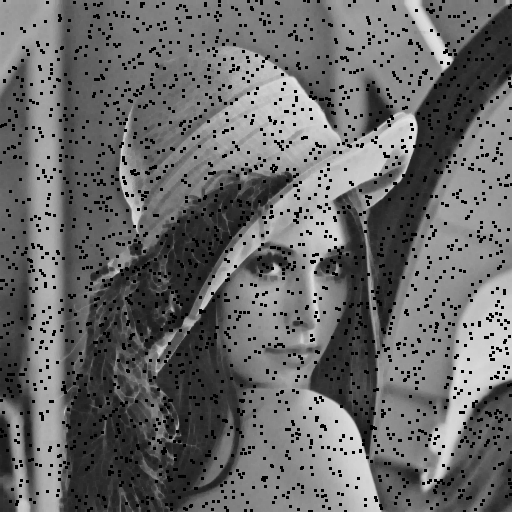

In [31]:
# Filtro minimo a imagen con ruido
imgMinNoise = ndimage.minimum_filter(imgNoise, size=3, axes=(0, 1))
imgMinNoiseGray = ndimage.minimum_filter(imgNoiseGray, size=3, axes=(0, 1))
cv2_imshow(imgMinNoise)
cv2_imshow(imgMinNoiseGray)

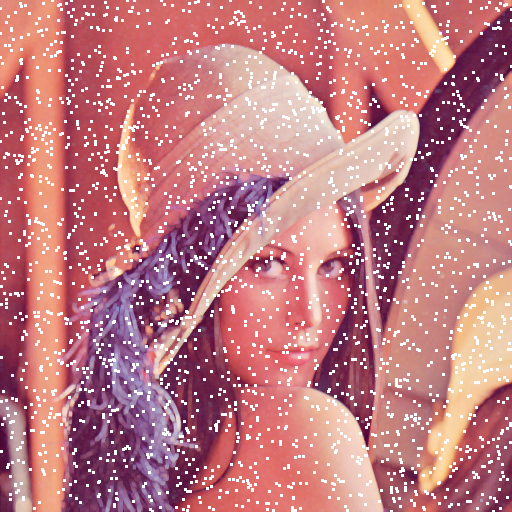

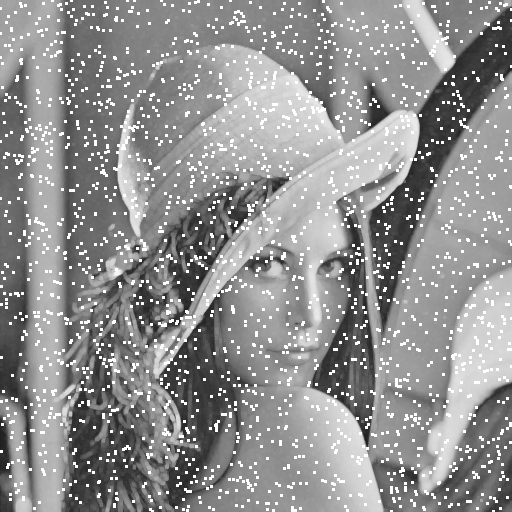

In [32]:
# Filtro maximo a imagen con ruido
imgMaxNoise = ndimage.maximum_filter(imgNoise, size=3, axes=(0, 1))
imgMaxNoiseGray = ndimage.maximum_filter(imgNoiseGray, size=3, axes=(0, 1))
cv2_imshow(imgMaxNoise)
cv2_imshow(imgMaxNoiseGray)

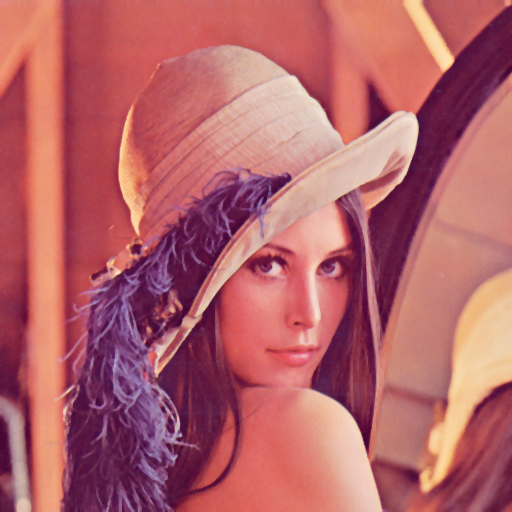

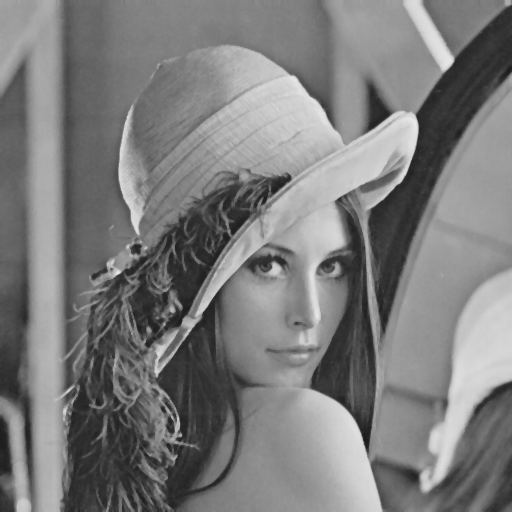

In [33]:
# Filtro mediana a imagen con ruido
imgMedianNoise = cv.medianBlur(imgNoise, 3)
imgMedianNoiseGray = cv.medianBlur(imgNoiseGray, 3)
cv2_imshow(imgMedianNoise)
cv2_imshow(imgMedianNoiseGray)

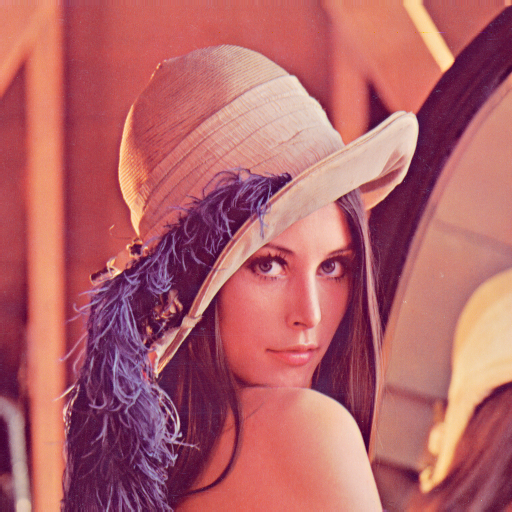

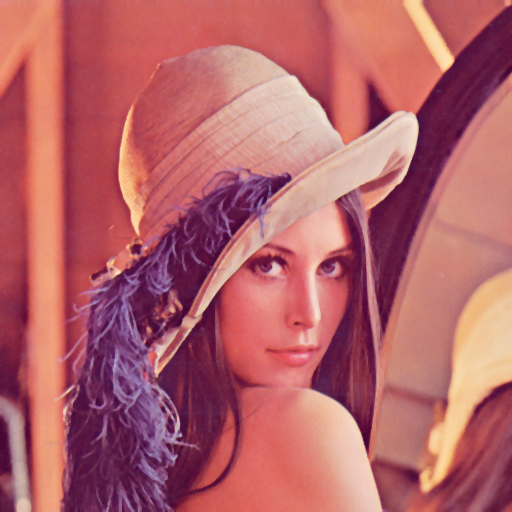

In [34]:
# Comparación de la imagen original y la imagen con ruido filtrada
cv2_imshow(img)
cv2_imshow(imgMedianNoise)

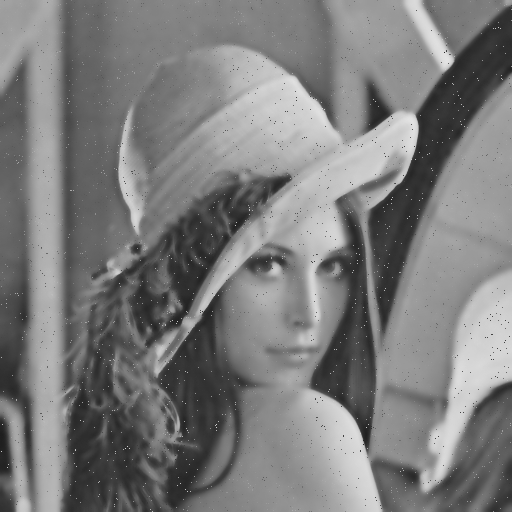

In [39]:
imgBilateral = cv.bilateralFilter(imgNoiseGray, 9, 75, 75)
cv2_imshow(imgBilateral)